# <span style="color:#336699">CAP-351 - Neurocomputação
<hr style="border:1px solid #0077b9;">

Professor:
- Mascos G. Quiles

Discente:
- Camila P. Sales

## Atividade

- Realizar testes com 3(ou mais) datasets selecionados do repositório da UCI (iris, etc...) para várias configuração da rede
- Ilustrar graficamente o processo de aprendizagem pela redução do erro quadrático médio
- Dividir o conjunto em duas partes (Treino e Validação)
- Entregar um relatório descrevendo os experimentos

### Considerar
- Impacto do termo de momentum
<br>
- Impacto da regularização L2

#### Datasets selecionados
 - Detecção de ocupação https://archive.ics.uci.edu/ml/datasets/Occupancy+Detection+#
 - Padrão de clientes de cartão de crédito https://archive.ics.uci.edu/ml/machine-learning-databases/00350/
 - Avila https://archive.ics.uci.edu/ml/datasets/Avila

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from livelossplot.keras import PlotLossesCallback
from sklearn.model_selection import train_test_split

from keras.models import Sequential, Model
from keras.layers import Dense, Input, Dropout
from keras.utils import to_categorical
from keras.optimizers import SGD

Using TensorFlow backend.


In [9]:
df = pd.read_csv( "../data/iris.data", sep="," , header = None);
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.columns = ['sepal length','sepal width','petal length','petal width', 'class']
df.head()
df.to_csv('iris.csv',index=False)

In [4]:
s = {'Iris-setosa': 0,'Iris-versicolor': 1,'Iris-virginica': 2}
df['class'] = df['class'].map(s)

In [5]:
X = df.drop('class',axis=1)
y = df['class'].to_numpy()

# Dividir os dados em conjuntos de treinamento e teste.
X_train, X_test, y_train, y_test = train_test_split(X, y)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [6]:
plot_losses = PlotLossesCallback()

In [7]:
model = Sequential()

model.add(Dense(64, input_dim=4, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy','mean_squared_error'
])

Instructions for updating:
Colocations handled automatically by placer.


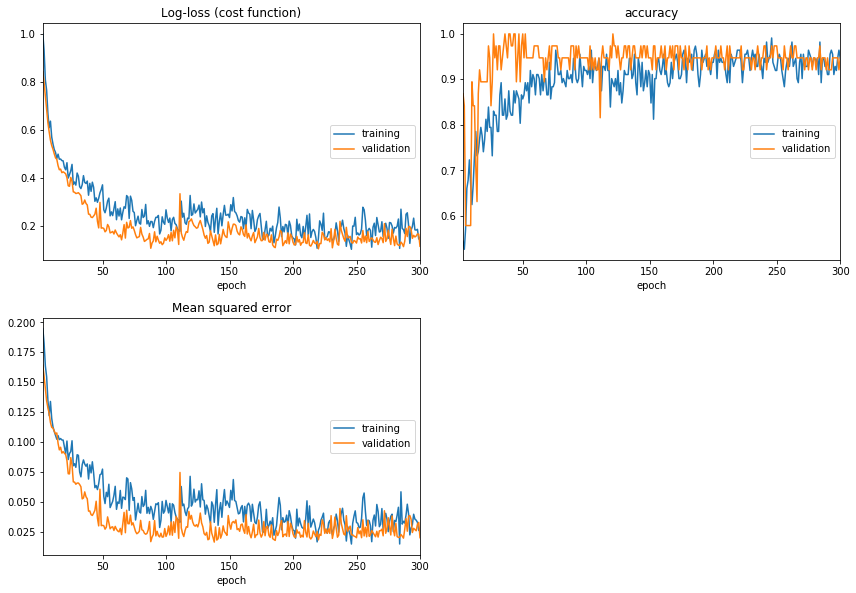

Log-loss (cost function):
training   (min:    0.102, max:    1.977, cur:    0.151)
validation (min:    0.104, max:    1.164, cur:    0.115)

accuracy:
training   (min:    0.348, max:    0.991, cur:    0.946)
validation (min:    0.316, max:    1.000, cur:    0.947)

Mean squared error:
training   (min:    0.015, max:    0.298, cur:    0.028)
validation (min:    0.016, max:    0.232, cur:    0.020)
38/38 [==============================] - 0s 412us/step


In [8]:
history = model.fit(X_train, y_train,
          epochs=300,
          validation_data=(X_test, y_test),
          callbacks=[plot_losses],
          verbose=0)
score = model.evaluate(X_test, y_test, batch_size=128)